In [1]:
# Importing libraries to initialise pyspark and spark session
import findspark
findspark.init()
findspark.find()
import pyspark
from pyspark.sql import SparkSession
pyspark.version

<module 'pyspark.version' from 'C:\\spark-3.1.2-bin-hadoop3.2\\python\\pyspark\\version.py'>

### 1. Importing Dataframe as an RDD

In [2]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("airbnb_listings").setMaster("local")
sc = SparkContext(conf=conf)
sc

<SparkContext master=local appName=airbnb_listings>

In [105]:
rdd = sc.textFile('airbnb_listings.csv')
print(type(rdd))
rdd.first()

<class 'pyspark.rdd.RDD'>


'id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_scores_rating,calculated_host_listings_count,availability_365'

In [106]:
rdd_head = rdd.first()
print(rdd_head)
rdd1 = rdd.filter(lambda line:line!=rdd_head)
rdd1.first()

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_scores_rating,calculated_host_listings_count,availability_365


'2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,,Oostelijk Havengebied - Indische Buurt,52.36575451,4.941419235,Apartment,Private room,2,59,3,248,28/11/2018,2.1,97,1,44'

In [107]:
rdd.map(lambda line:line.split(',')).take(1)

[['id',
  'name',
  'host_id',
  'host_name',
  'neighbourhood_group',
  'neighbourhood',
  'latitude',
  'longitude',
  'property_type',
  'room_type',
  'accommodates',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'last_review',
  'reviews_per_month',
  'review_scores_rating',
  'calculated_host_listings_count',
  'availability_365']]

In [110]:
# Pulling ID, Neighbourhood, room type and price using RDD
(rdd.filter(lambda line:line.split(',')[6] in ['Westerpark','Centrum-Oost']).
 map(lambda line:(line.split(',')[0],
                 line.split(',')[6],
                 line.split(',')[10],
                 line.split(',')[12])).take(5))

[('3209', 'Westerpark', 'Entire home/apt', '160'),
 ('44391', 'Centrum-Oost', 'Entire home/apt', '200'),
 ('76668', 'Westerpark', 'Private room', '135'),
 ('107195', 'Centrum-Oost', 'Entire home/apt', '150'),
 ('306852', 'Centrum-Oost', 'Entire home/apt', '195')]

### 2. Importing Dataframe as Pyspark SQL dataframe

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .getOrCreate()
spark.version

'3.1.2'

In [4]:
df = spark.read.csv('airbnb_listings.csv',header=True, inferSchema=True)
print(type(df))
df.show(5)

<class 'pyspark.sql.dataframe.DataFrame'>
+-----+--------------------+-------+---------+-------------------+--------------------+-----------+-----------+-------------+---------------+------------+-----+--------------+-----------------+-----------+-----------------+--------------------+------------------------------+----------------+
|   id|                name|host_id|host_name|neighbourhood_group|       neighbourhood|   latitude|  longitude|property_type|      room_type|accommodates|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|review_scores_rating|calculated_host_listings_count|availability_365|
+-----+--------------------+-------+---------+-------------------+--------------------+-----------+-----------+-------------+---------------+------------+-----+--------------+-----------------+-----------+-----------------+--------------------+------------------------------+----------------+
| 2818|Quiet Garden View...|   3159|   Daniel|               null|Oostelijk Hav

## 3. Data Pre-processing

In [5]:
# Column Names and its type as a pyspark sql dataframe
print(df.printSchema())

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: string (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)

None


In [6]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import to_date

df = df.withColumn("id", df["id"].cast(IntegerType()))
df = df.withColumn("host_id", df["host_id"].cast(IntegerType()))
df = df.withColumn("accommodates", df["accommodates"].cast(IntegerType()))
df = df.withColumn("price", df["price"].cast(IntegerType()))
df = df.withColumn("latitude", df["latitude"].cast(DoubleType()))
df = df.withColumn("longitude", df["longitude"].cast(DoubleType()))
df = df.withColumn("number_of_reviews", df["number_of_reviews"].cast(IntegerType()))
df = df.withColumn("reviews_per_month", df["reviews_per_month"].cast(DoubleType()))
#df = df.withColumn('last_review',to_date(df["last_review"], 'dd-MM-yyy'))
print(df.printSchema())

# Column names and its type as a pandas data frame
import pandas as pd
from pandas import DataFrame
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: string (nullable = true)
 |-- reviews_per_month: double (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)

None


Column Name Data type
0                               id       int
1                             name    string
2                          host_id       int
3                        host_name    string
4              neighbourhood_group    string
5                    neighbourhood    string
6                         latitude    double
7                        longitude    double
8                    property_type    string
9                        room_type    string
10                    accommodates       int
11                           price       int
12                  minimum_nights       int
13               number_of_reviews       int
14                     last_review    string
15               reviews_per_month    double
16            review_scores_rating    double
17  calculated_host_listings_count       int
18                availability_365       int

### Handling Null/Missing values

-RECORD 0-------------------------------
 id                             | 18    
 name                           | 38    
 host_id                        | 39    
 host_name                      | 40    
 neighbourhood_group            | 20027 
 neighbourhood                  | 22    
 latitude                       | 22    
 longitude                      | 35    
 property_type                  | 18    
 room_type                      | 18    
 accommodates                   | 22    
 price                          | 18    
 minimum_nights                 | 18    
 number_of_reviews              | 35    
 last_review                    | 2424  
 reviews_per_month              | 2429  
 review_scores_rating           | 2655  
 calculated_host_listings_count | 18    
 availability_365               | 35    



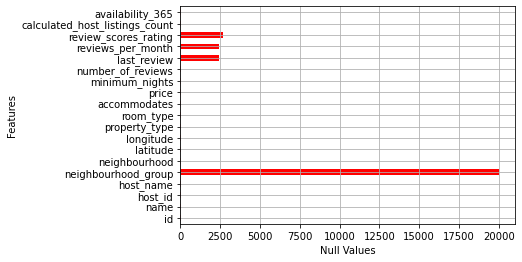

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Checking NULL/Missing Values
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical=True)

#df.isnull().sum().plot.barh() (Doesn't work without converting it to pandas)

plt.figure()
na_value = df.toPandas()
na_value.isnull().sum().plot.barh(color= 'red')
#plt.xticks(np.arange(0,20000,100))
plt.xlabel('Null Values')
plt.ylabel('Features')
plt.grid()
plt.show()

In [8]:
# Filling empty values in "review_scores_rating" with 0
df = df.fillna( { 'review_scores_rating':0} )

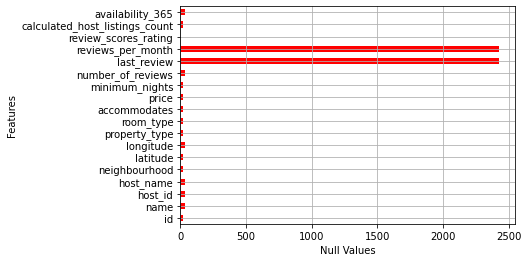

In [9]:
# Dropping empty Column "neighbourhood_group"
df = df.drop("neighbourhood_group")

plt.figure()
na_value = df.toPandas()
na_value.isnull().sum().plot.barh(color= 'red')
#plt.xticks(np.arange(0,20000,100))
plt.xlabel('Null Values')
plt.ylabel('Features')
plt.grid()
plt.show()

In [10]:
# Removing any null/missing values from our dataframe
df = df.dropna(how='any', thresh=None, subset=None)
df.count()

17573

In [11]:
# Data size (total number of rows x columns) after removing null/missing values
df.show(3)
print((df.count(), len(df.columns)))

+-----+--------------------+-------+---------+--------------------+-----------+-----------+-------------+---------------+------------+-----+--------------+-----------------+-----------+-----------------+--------------------+------------------------------+----------------+
|   id|                name|host_id|host_name|       neighbourhood|   latitude|  longitude|property_type|      room_type|accommodates|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|review_scores_rating|calculated_host_listings_count|availability_365|
+-----+--------------------+-------+---------+--------------------+-----------+-----------+-------------+---------------+------------+-----+--------------+-----------------+-----------+-----------------+--------------------+------------------------------+----------------+
| 2818|Quiet Garden View...|   3159|   Daniel|Oostelijk Havenge...|52.36575451|4.941419235|    Apartment|   Private room|           2|   59|             3|              248| 28/11/2

## 4. Exploratory Data Analysis (EDA)

### 4.1 Exploring Pyspark functions for EDA :

In [12]:
from pyspark.sql import functions
print(dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

In [13]:
df.cache()

DataFrame[id: int, name: string, host_id: int, host_name: string, neighbourhood: string, latitude: double, longitude: double, property_type: string, room_type: string, accommodates: int, price: int, minimum_nights: int, number_of_reviews: int, last_review: string, reviews_per_month: double, review_scores_rating: double, calculated_host_listings_count: int, availability_365: int]

In [14]:
# Numerical type features
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
print(numeric_features)

['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'calculated_host_listings_count', 'availability_365']


In [15]:
# Summary for all numerical columns in the dataset.
import pyspark.sql.functions as F
(df.describe().select(
                    "summary",
                    F.round("id", 4).alias("id"),
                    F.round("host_id", 4).alias("host_id"),
                    F.round("latitude", 4).alias("latitude"),
                    F.round("longitude").alias("longitude"),
                    F.round("accommodates").alias("accommodates"),
                    F.round("price", 4).alias("price"),
                    F.round("minimum_nights", 4).alias("minimum_nights")).show())
(df.describe().select(
                    "summary",
                    F.round("number_of_reviews", 4).alias("number_of_reviews"),
                    F.round("reviews_per_month", 4).alias("reviews_per_month"),
                    F.round("review_scores_rating", 4).alias("review_scores_rating"),
                    F.round("calculated_host_listings_count", 4).alias("calculated_host_listings_count"),
                    F.round("availability_365", 4).alias("availability_365"))
                    .show())

+-------+---------------+---------------+--------+---------+------------+--------+--------------+
|summary|             id|        host_id|latitude|longitude|accommodates|   price|minimum_nights|
+-------+---------------+---------------+--------+---------+------------+--------+--------------+
|  count|        17573.0|        17573.0| 17573.0|  17573.0|     17573.0| 17573.0|       17573.0|
|   mean|1.46592187211E7|4.59806763982E7| 52.3654|      5.0|         3.0|148.7555|        3.1754|
| stddev|   8275746.1695|5.37070071436E7|  0.0158|      0.0|         1.0|137.9473|       12.4388|
|    min|         2818.0|         3159.0| 52.2893|      5.0|         1.0|     0.0|           1.0|
|    max|    3.0550093E7|   2.28225831E8| 52.4247|      5.0|        17.0|  8500.0|        1001.0|
+-------+---------------+---------------+--------+---------+------------+--------+--------------+

+-------+-----------------+-----------------+--------------------+------------------------------+----------------+
|s

In [16]:
df.groupBy('host_name').count().show()

+-----------------+-----+
|        host_name|count|
+-----------------+-----+
|         Bastiaan|   17|
|           Dorien|   10|
|Lodewijk & Esther|    1|
|  Michael Jacques|    1|
|             Faye|    2|
| Ruud & Esmeralda|    1|
|          Roeland|    5|
|         Laurence|    4|
|      Jean-Michel|    1|
|             Bogy|    1|
|            Tyler|    1|
|             July|    3|
|         Francois|    5|
|    Joost & Milou|    1|
|          Folkert|    2|
|          Susanna|    1|
|            Guyon|    1|
|           Carmit|    1|
|              R.A|    1|
|           Talisa|    1|
+-----------------+-----+
only showing top 20 rows



In [17]:
df.groupBy('name').count().show()

+--------------------+-----+
|                name|count|
+--------------------+-----+
|Green studio at t...|    1|
|Laid back and Rel...|    1|
|Studio with balco...|    1|
|Westerpark View m...|    1|
|Bright house with...|    1|
|Comfortable 2P ap...|    1|
|Lovely Flat in Hi...|    1|
|Private bedroom i...|    1|
|Spacious design a...|    1|
|Spacious 2BR apar...|    1|
|GORGEOUS APT+HEAR...|    1|
|Heerlijk familie ...|    1|
|Apartment nearby ...|    1|
|Spacious appt in ...|    1|
|Cousy apartment n...|    1|
|Leidse Square, ci...|    1|
|Design houseboat ...|    1|
|Great appartment ...|    2|
|For couple, locat...|    1|
|Charming & Light ...|    1|
+--------------------+-----+
only showing top 20 rows



In [18]:
df.groupBy('property_type').count().orderBy('count',ascending= False).show(30)

+--------------------+-----+
|       property_type|count|
+--------------------+-----+
|           Apartment|13730|
|               House| 1265|
|           Townhouse|  569|
|   Bed and breakfast|  408|
|                Loft|  358|
|                Boat|  342|
|         Condominium|  296|
|           Houseboat|  204|
|         Guest suite|  148|
|  Serviced apartment|   54|
|          Guesthouse|   41|
|               Other|   39|
|               Villa|   28|
|      Boutique hotel|   26|
|               Cabin|   12|
|             Cottage|   11|
|            Bungalow|   10|
|               Hotel|    6|
|          Tiny house|    5|
|                Barn|    4|
|Casa particular (...|    3|
|          Aparthotel|    3|
|              Chalet|    3|
|              Hostel|    3|
|              Castle|    1|
|          Lighthouse|    1|
|         Earth house|    1|
|            Campsite|    1|
|        Nature lodge|    1|
+--------------------+-----+



In [19]:
df.groupBy('room_type').count().show()

+---------------+-----+
|      room_type|count|
+---------------+-----+
|    Shared room|   57|
|Entire home/apt|13940|
|   Private room| 3576|
+---------------+-----+



In [20]:
df.groupBy('availability_365').count().show()

+----------------+-----+
|availability_365|count|
+----------------+-----+
|             148|   13|
|             243|    6|
|              31|   48|
|             137|    9|
|              85|   24|
|             251|    7|
|              65|   57|
|              53|   45|
|             255|    7|
|             296|   10|
|             133|   13|
|             322|   11|
|              78|   28|
|             362|   37|
|             321|   10|
|             108|   12|
|             155|   27|
|             193|   13|
|              34|   57|
|             211|    7|
+----------------+-----+
only showing top 20 rows



In [21]:
#Top 10 neighbourhood listings count 
df.groupBy('neighbourhood').count().orderBy('count',ascending= False).show(10)

+--------------------+-----+
|       neighbourhood|count|
+--------------------+-----+
|De Baarsjes - Oud...| 3134|
|De Pijp - Riviere...| 2180|
|        Centrum-West| 2087|
|        Centrum-Oost| 1502|
|          Westerpark| 1329|
|                Zuid| 1227|
|            Oud-Oost| 1162|
|       Bos en Lommer| 1010|
|Oostelijk Havenge...|  853|
|           Oud-Noord|  506|
+--------------------+-----+
only showing top 10 rows



In [22]:
# Calculating most popular room type
print(df.select('room_type').distinct().show())

#percentage of city in alltypes
from pyspark.sql.functions import col
print('Entire home/apt: ',df.filter(col('room_type') == 'Entire home/apt').count() / df.select('room_type').count())

+---------------+
|      room_type|
+---------------+
|    Shared room|
|Entire home/apt|
|   Private room|
+---------------+

None
Entire home/apt:  0.7932623911682695


About 79.3% people have opted for 'Entire home/apt' and remaining 21% have opted for shared or private room.

### 4.2 Lazy Evaluation:

In [23]:
# Lazy Evaluation:

popular_host = df.select(df.number_of_reviews, df.host_name) \
    .distinct() \
    .groupBy(df.host_name) \
    .count() \
    .orderBy("count", ascending=False)

print(popular_host.collect()[:5])

popular_hosts_df =popular_host.limit(5).toPandas()
print(popular_hosts_df)

[Row(host_name='Martijn', count=46), Row(host_name='Michiel And Jane', count=42), Row(host_name='Jan', count=40), Row(host_name='Laura', count=40), Row(host_name='Eva', count=39)]
          host_name  count
0           Martijn     46
1  Michiel And Jane     42
2               Jan     40
3             Laura     40
4               Eva     39


### 4.3 Exploratory Data Analysis with Visualizations:

In [24]:
# Plotting Numerical Features
import seaborn as sns
import matplotlib.pyplot as plt
# Coverting dataframe to pandas for visualisations
df_viz = df.toPandas()

#### Density plots for Numerical Features:

In [25]:
# Numerical type features
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
print(numeric_features)

['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'calculated_host_listings_count', 'availability_365']


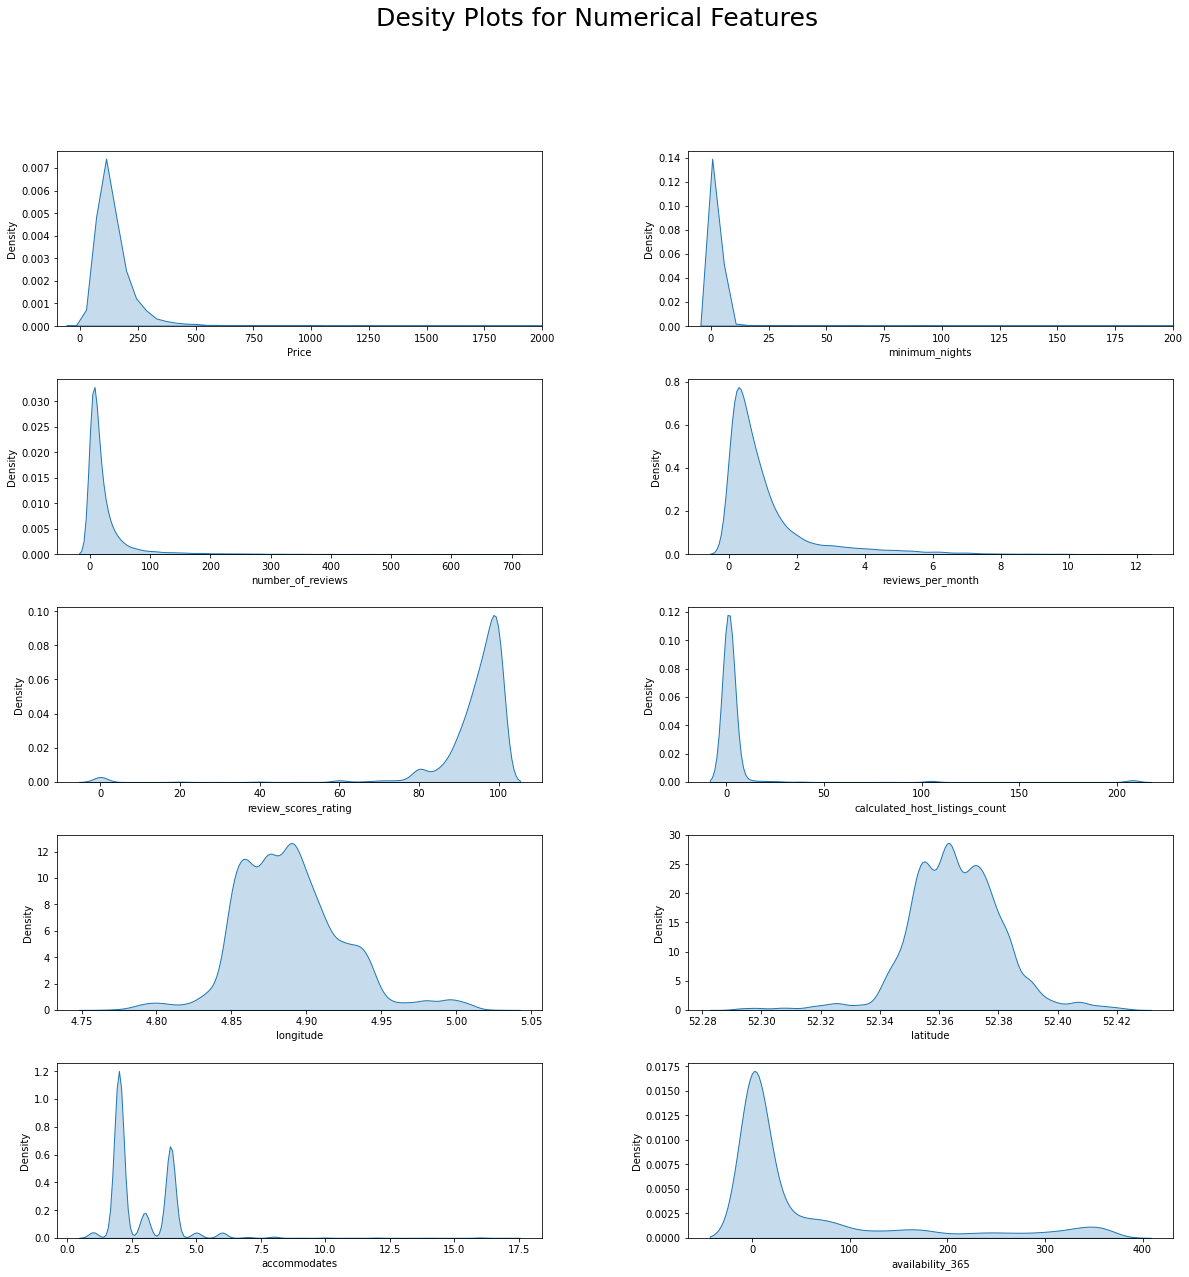

In [26]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20, 20))
rows = 5
columns = 2
grid = plt.GridSpec(rows, columns, wspace = .3, hspace = .3)

plt.subplot(grid[0])
plt.xlim(-100,2000)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(df_viz['price'],shade=True)

plt.subplot(grid[1])
plt.xlim(-10,200)
plt.xlabel('minimum_nights')
plt.ylabel('Density')
sns.kdeplot(df_viz['minimum_nights'],shade=True)

plt.subplot(grid[2])
plt.xlabel('number_of_reviews')
plt.ylabel('Density')
sns.kdeplot(df_viz['number_of_reviews'],shade=True)

plt.subplot(grid[3])
plt.xlabel('reviews_per_month')
plt.ylabel('Density')
sns.kdeplot(df_viz['reviews_per_month'],shade=True)

plt.subplot(grid[4])
plt.xlabel('review_scores_rating')
plt.ylabel('Density')
sns.kdeplot(df_viz['review_scores_rating'],shade=True)

plt.subplot(grid[5])
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Density')
sns.kdeplot(df_viz['calculated_host_listings_count'],shade=True)


plt.subplot(grid[6])
plt.xlabel('longitude')
plt.ylabel('Density')
sns.kdeplot(df_viz['longitude'],shade=True)

plt.subplot(grid[7])
plt.xlabel('latitude')
plt.ylabel('Density')
sns.kdeplot(df_viz['latitude'],shade=True)

plt.subplot(grid[8])
plt.xlabel('accommodates')
plt.ylabel('Density')
sns.kdeplot(df_viz['accommodates'],shade=True)

plt.subplot(grid[9])
plt.xlabel('availability_365')
plt.ylabel('Density')
sns.kdeplot(df_viz['availability_365'],shade=True)

fig.suptitle('Desity Plots for Numerical Features', fontsize= 25)
plt.show()

Checking the statistical distribution of prices
count    17573.000000
mean       148.755477
std        137.947335
min          0.000000
25%         96.000000
50%        125.000000
75%        175.000000
max       8500.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 148.76 and sigma = 137.94



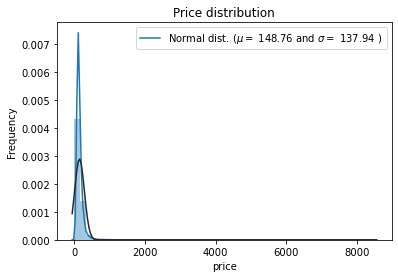

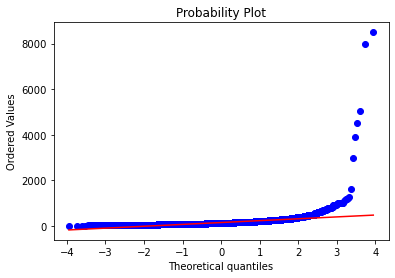

In [27]:
from scipy import stats
from scipy.stats import norm

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    
check_dist(df_viz['price'])


 mu = 4.87 and sigma = 0.48



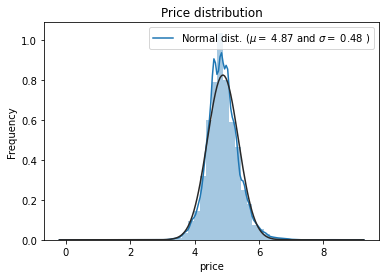

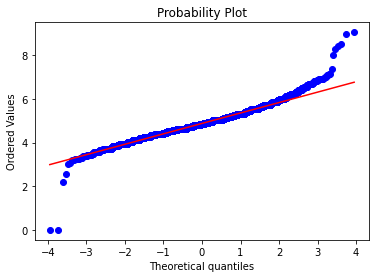

0        4.094345
1        5.081404
2        4.394449
3        4.836282
4        5.017280
           ...   
17568    4.454347
17569    4.189655
17570    3.713572
17571    5.361292
17572    3.713572
Name: price, Length: 17573, dtype: float64

In [28]:
def correct_dist(price):
    price = np.log1p(price)

    #Check the new distribution 
    sns.distplot(price , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    return price

correct_dist(df_viz['price'])

#### Count plots for Categorical Features:

In [29]:
# Categorical type features
catagorical_features = [t[0] for t in df.dtypes if t[1] == 'string']
print(catagorical_features)


['name', 'host_name', 'neighbourhood', 'property_type', 'room_type', 'last_review']


<Figure size 432x288 with 0 Axes>

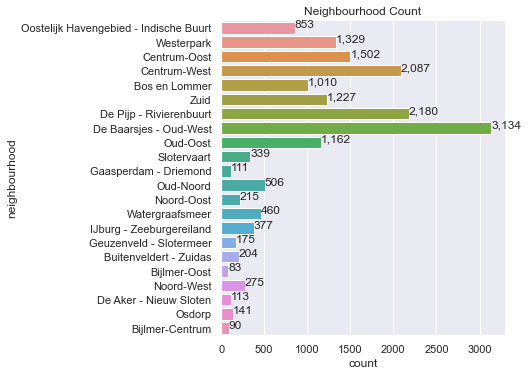

In [30]:
from matplotlib.patches import Circle, Rectangle, Arc
plt.figure()
sns.set_theme(style="darkgrid")
g=sns.catplot(y = "neighbourhood", kind="count", data=df_viz, aspect=11.7/8.27)

for ax in g.axes.ravel():
    for p in ax.patches:
        percentage ='{:,.0f}'.format(p.get_width())
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))    
    
plt.title("Neighbourhood Count")
plt.show()

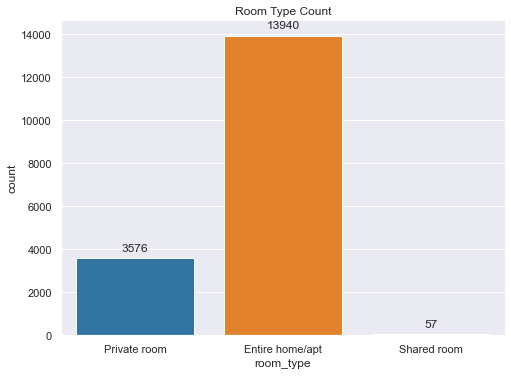

In [31]:
sns.set_theme(style="darkgrid")
g1=sns.catplot(x = "room_type", kind="count", data=df_viz, aspect=11.7/8.27, palette="tab10")
for ax in g1.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
        textcoords = 'offset points')
plt.title("Room Type Count")
plt.show()

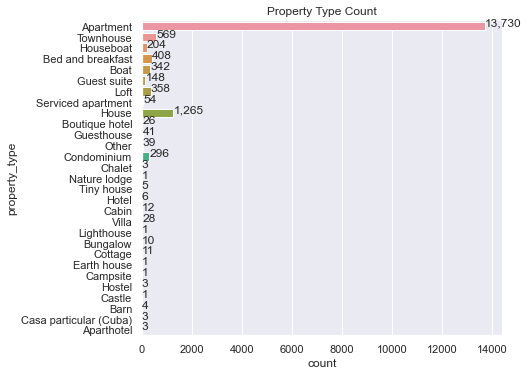

In [32]:
sns.set_theme(style="darkgrid")
g2=sns.catplot(y = "property_type", kind="count", data=df_viz, aspect=11.7/8.27)
for ax in g2.axes.ravel():
    for p in ax.patches:
        percentage ='{:,.0f}'.format(p.get_width())
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))    
    
plt.title("Property Type Count")
plt.show()

### Price Vs Categorical Features

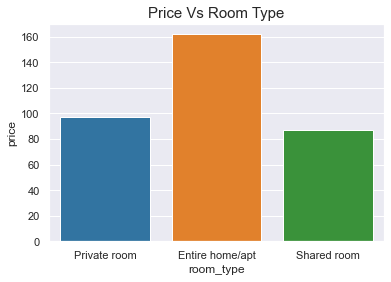

In [33]:
plt.figure()
sns.barplot(x='room_type',y='price', data=df_viz, palette="tab10",ci = None)
plt.title("Price Vs Room Type", size=15)
plt.show()

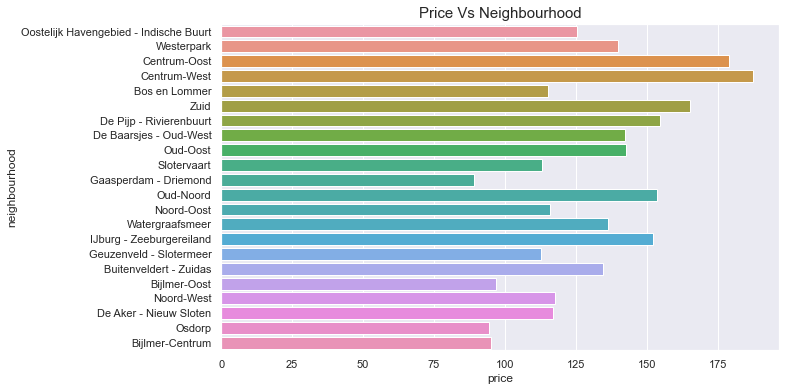

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x="price", y="neighbourhood", data=df_viz, ci = None)
plt.title("Price Vs Neighbourhood",size=15)
plt.show()

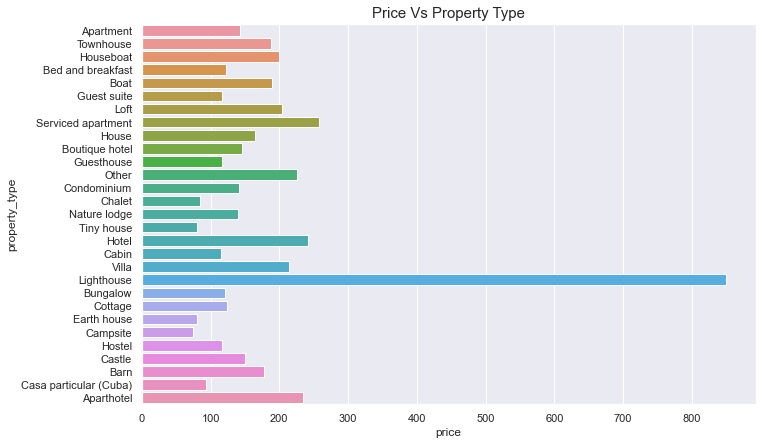

In [35]:
plt.figure(figsize=(11,7))
sns.barplot(x="price", y="property_type", data=df_viz, ci = None)
plt.title("Price Vs Property Type",size=15)
plt.show()

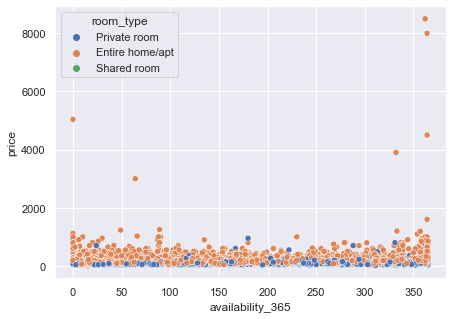

In [36]:
plt.figure(figsize=(7,5))
sns.scatterplot(df_viz.availability_365,df_viz.price,hue=df_viz.room_type)
plt.show()

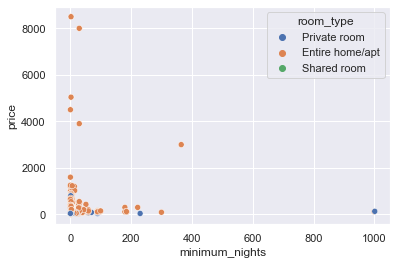

In [37]:
plt.figure()
sns.scatterplot(df_viz.minimum_nights,df_viz.price,hue=df_viz.room_type)
plt.show()

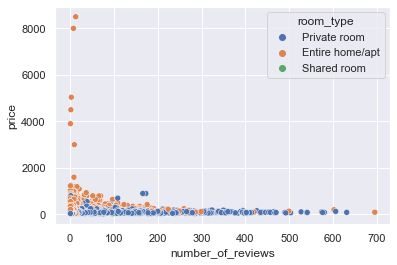

In [38]:
plt.figure()
sns.scatterplot(df_viz.number_of_reviews,df_viz.price,hue=df_viz.room_type)
plt.show()

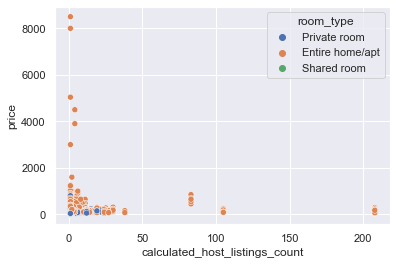

In [39]:
plt.figure()
sns.scatterplot(df_viz.calculated_host_listings_count,df_viz.price,hue=df_viz.room_type)
plt.show()

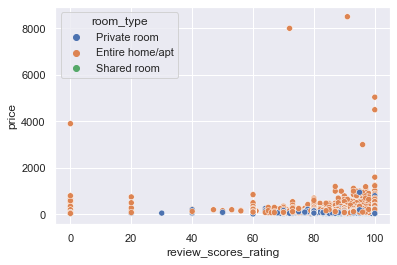

In [40]:
plt.figure()
sns.scatterplot(df_viz.review_scores_rating,df_viz.price,hue=df_viz.room_type)
plt.show()

### Boxplots availability_365 Vs Categorical Features:

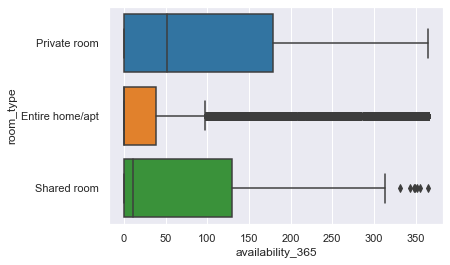

In [41]:
plt.figure()
sns.boxplot(data=df_viz, y='room_type',x='availability_365', palette="tab10")
plt.show()

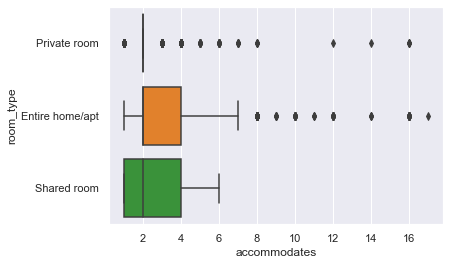

In [42]:
plt.figure()
sns.boxplot(data=df_viz, y='room_type',x='accommodates', palette="tab10")
plt.show()

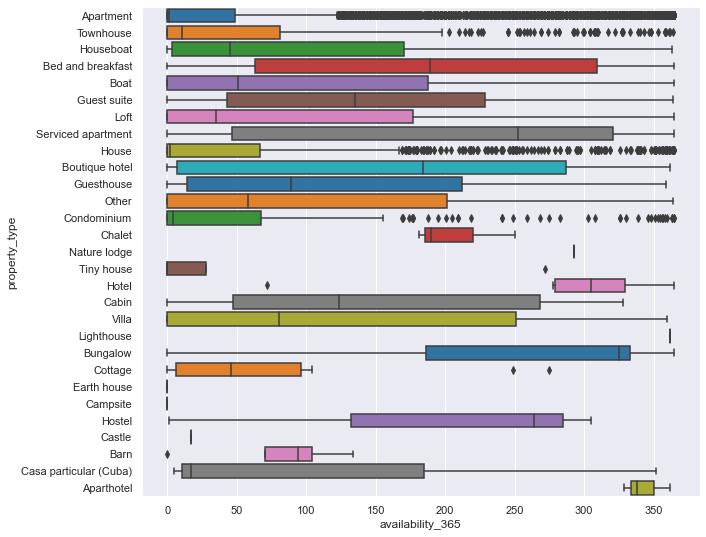

In [43]:
plt.figure(figsize=(10,9))
sns.boxplot(data=df_viz, y='property_type',x='availability_365', palette="tab10")
plt.show()

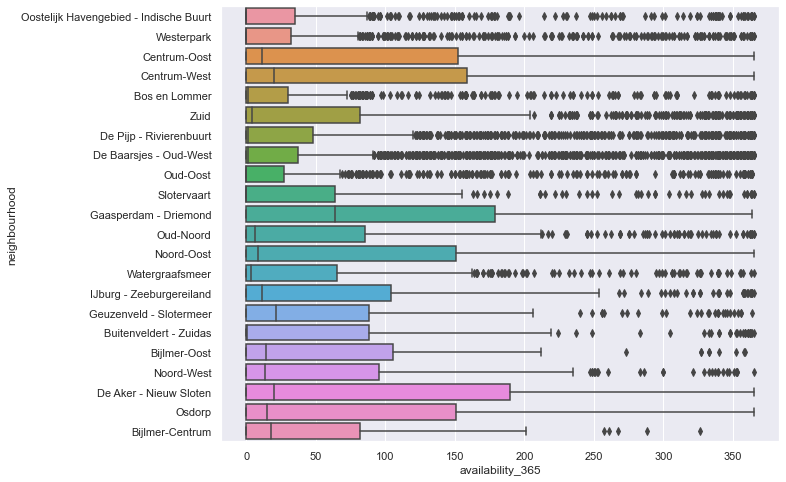

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_viz, y='neighbourhood',x='availability_365')
plt.show()

### Exploring Neighbourhood (Latitude and Longitude):

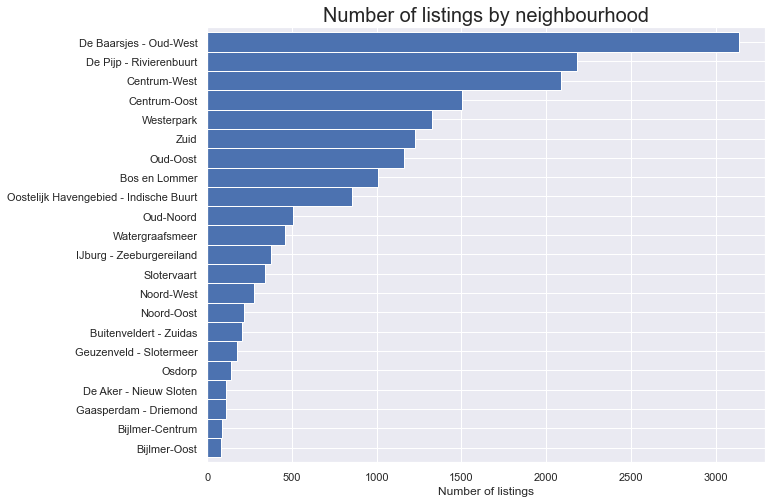

In [45]:
neigh =df_viz['neighbourhood'].value_counts().sort_values(ascending=True)
neigh.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

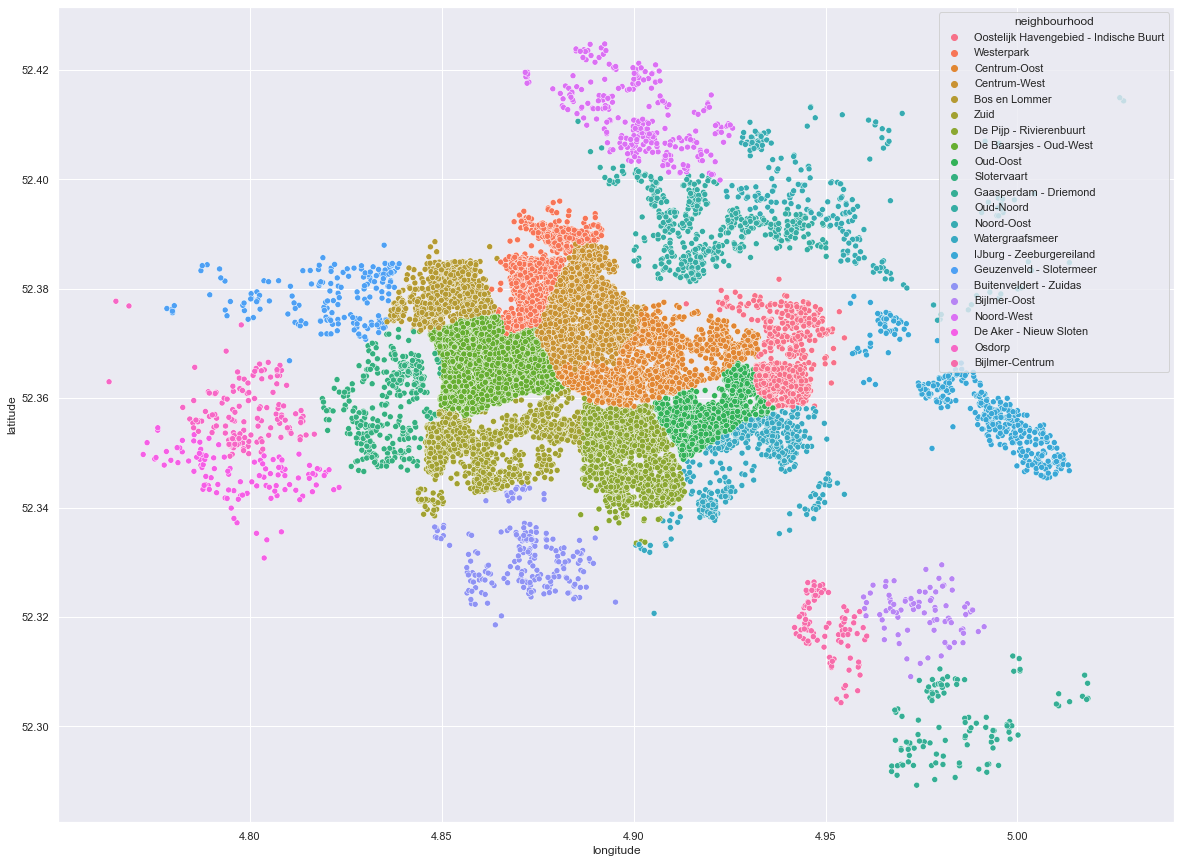

In [46]:
plt.figure(figsize=(20,15))
sns.scatterplot(df_viz.longitude,df_viz.latitude,hue=df_viz.neighbourhood)
plt.show()

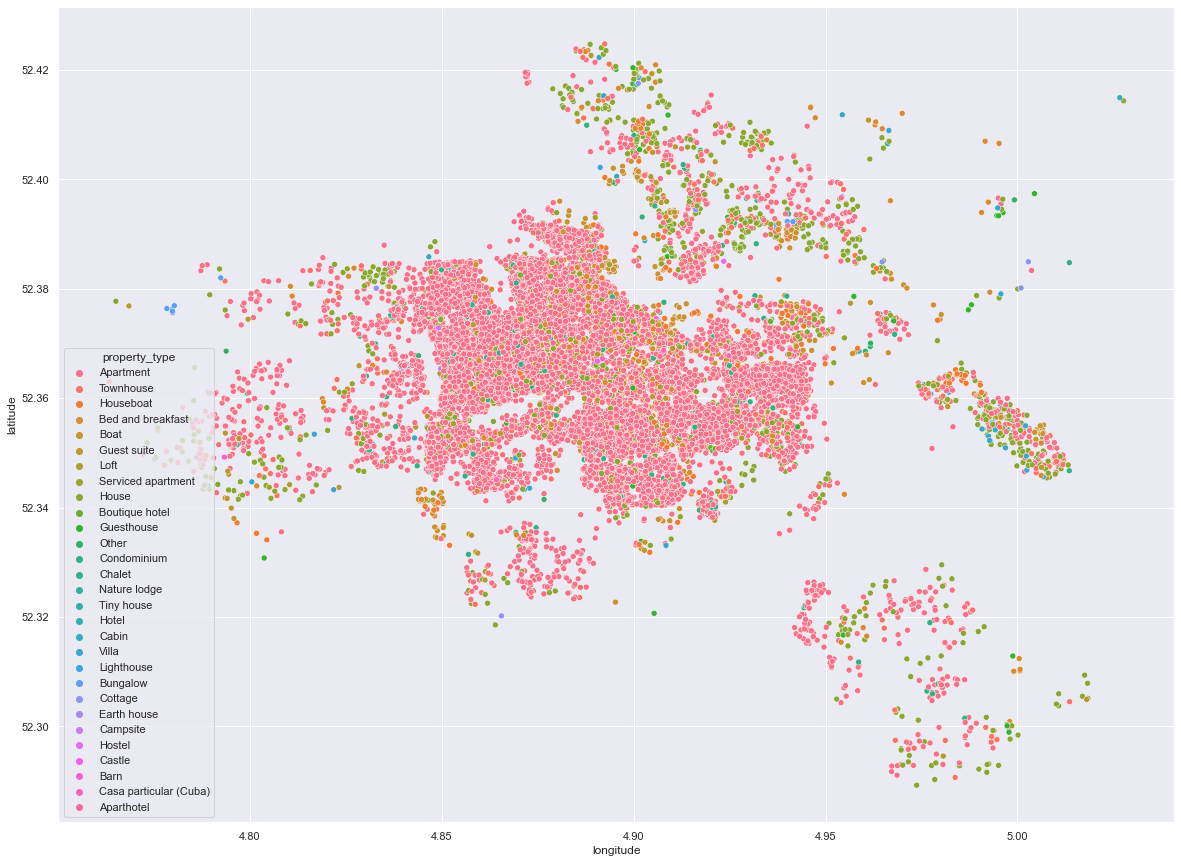

In [47]:
plt.figure(figsize=(20,15))
sns.scatterplot(df_viz.longitude,df_viz.latitude,hue=df_viz.property_type)
plt.show()

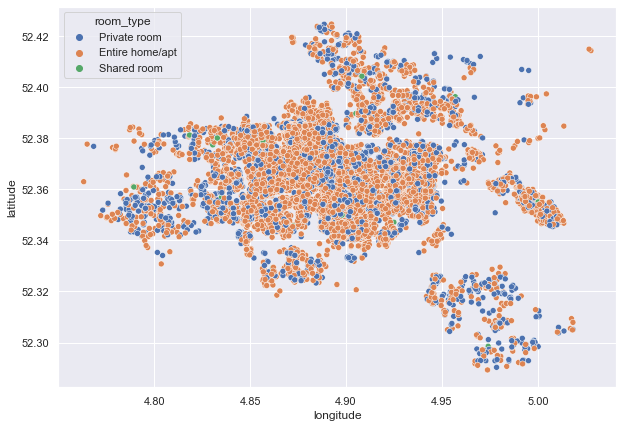

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(df_viz.longitude,df_viz.latitude,hue=df_viz.room_type)
plt.show()

In [49]:
neighbourhood_count = pd.DataFrame({'neighbourhood': df_viz['neighbourhood'].value_counts().index, 
                                    'count': df_viz['neighbourhood'].value_counts().values})
neighbourhood_count.head()

neighbourhood  count
0   De Baarsjes - Oud-West   3134
1  De Pijp - Rivierenbuurt   2180
2             Centrum-West   2087
3             Centrum-Oost   1502
4               Westerpark   1329

In [50]:
import folium
from folium.plugins import FastMarkerCluster
#import geopandas as gpd
from branca.colormap import LinearColormap
lats2018 = df_viz['latitude'].tolist()
lons2018 = df_viz['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

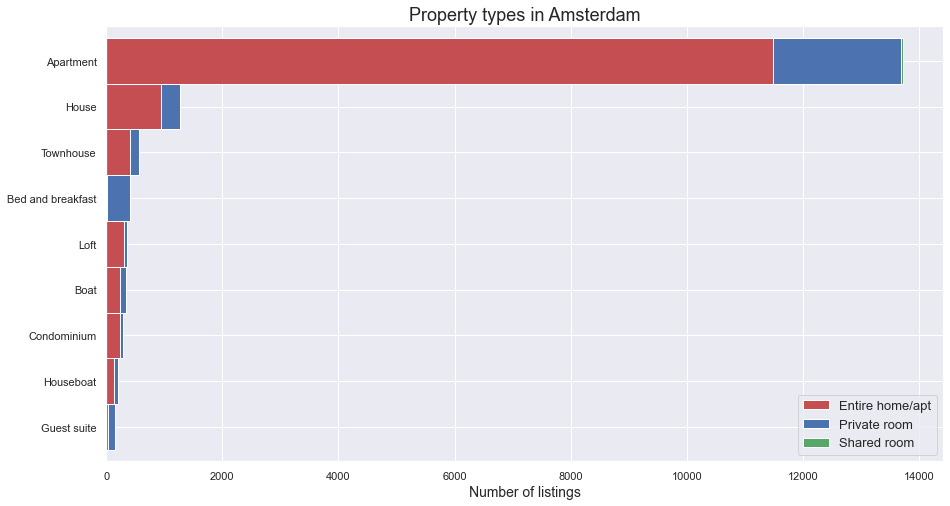

In [51]:
prop = df_viz.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

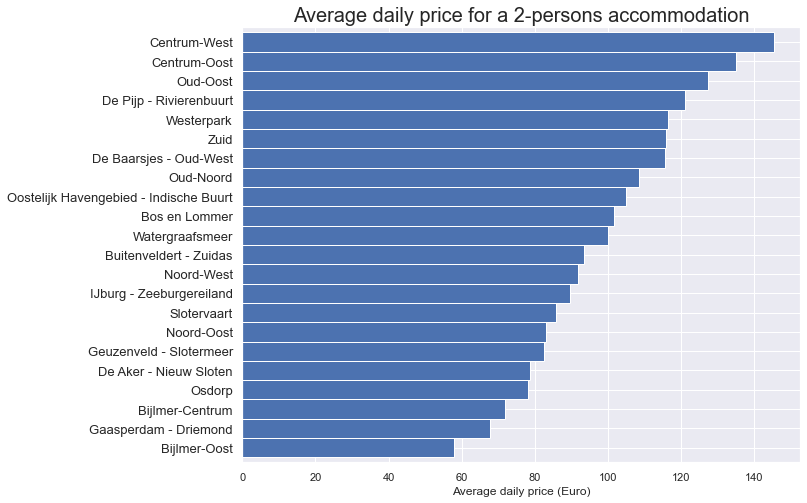

In [52]:
neigh1 = df_viz[df_viz['accommodates']==2]
neigh2 = neigh1.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
neigh2.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

In [53]:
import geopandas as gpd
import branca
geo = gpd.read_file("neighbourhoods.geojson")
neigh3 = pd.DataFrame([neigh2])
neigh3 = neigh3.transpose()
geo = pd.merge(geo, neigh3, on='neighbourhood', how='left')
geo.rename(columns={'price': 'average_price'}, inplace=True)
geo.average_price = geo.average_price.round(decimals=0)

map_dict = geo.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map2 = folium.Map(location=[52.3680, 4.9036], zoom_start=11)
folium.GeoJson(data=geo,
               name='Amsterdam',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5,
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map2)
# Adding Legend
colormap = branca.colormap.linear.YlOrRd_09.scale(70, 150)
colormap = colormap.to_step(index=[70,83,97,110,123,137,150])
colormap.caption = 'The average_price'
colormap.add_to(map2)
map2

### Word Cloud:

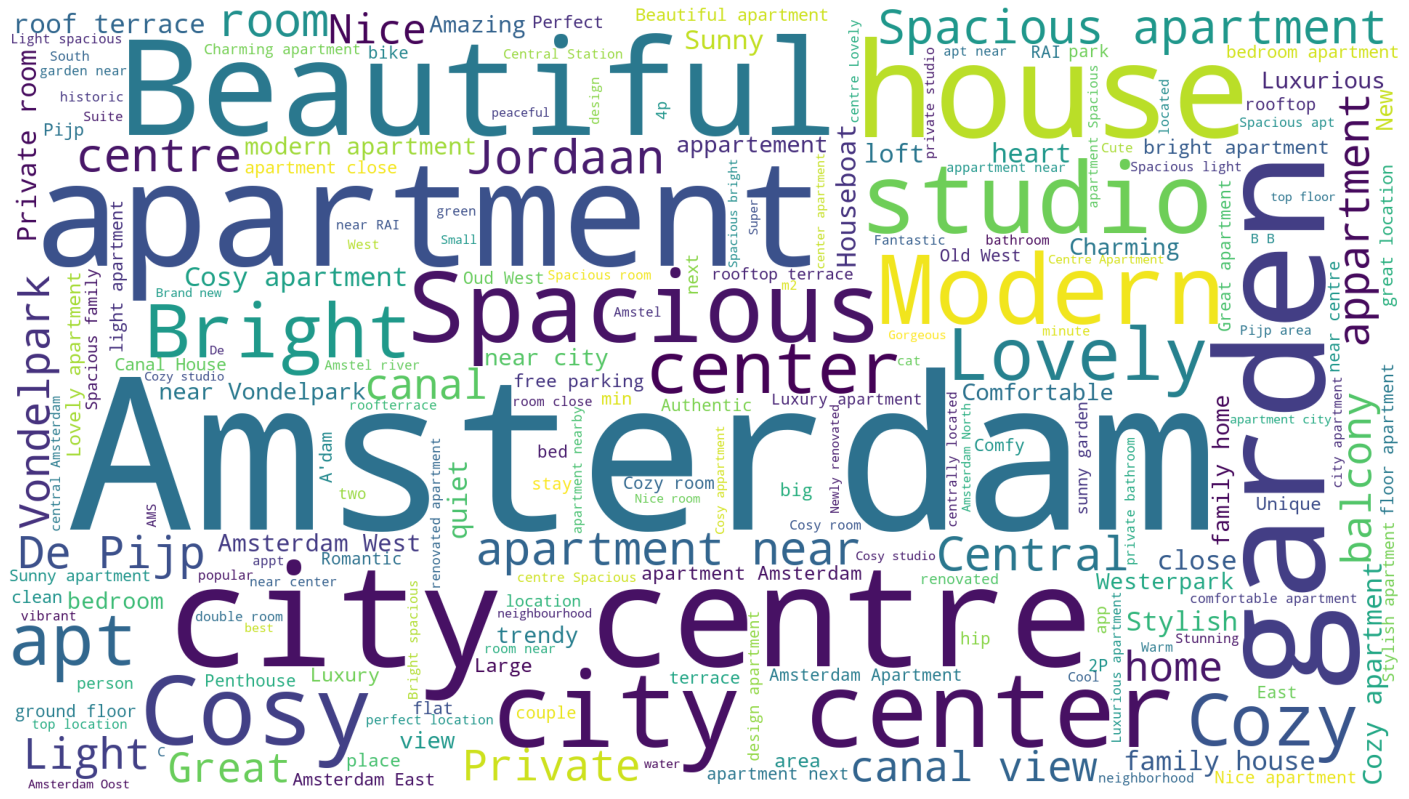

In [54]:
# Analysing Listing names
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',
                    width=1920,
                    height=1080
                    ).generate(" ".join(df_viz.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 5. Predicting Price (Machine Learning) :

In [55]:
df.show(3)
df.printSchema()

+-----+--------------------+-------+---------+--------------------+-----------+-----------+-------------+---------------+------------+-----+--------------+-----------------+-----------+-----------------+--------------------+------------------------------+----------------+
|   id|                name|host_id|host_name|       neighbourhood|   latitude|  longitude|property_type|      room_type|accommodates|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|review_scores_rating|calculated_host_listings_count|availability_365|
+-----+--------------------+-------+---------+--------------------+-----------+-----------+-------------+---------------+------------+-----+--------------+-----------------+-----------+-----------------+--------------------+------------------------------+----------------+
| 2818|Quiet Garden View...|   3159|   Daniel|Oostelijk Havenge...|52.36575451|4.941419235|    Apartment|   Private room|           2|   59|             3|              248| 28/11/2

### 5.1 Checking Correlation between the Features:

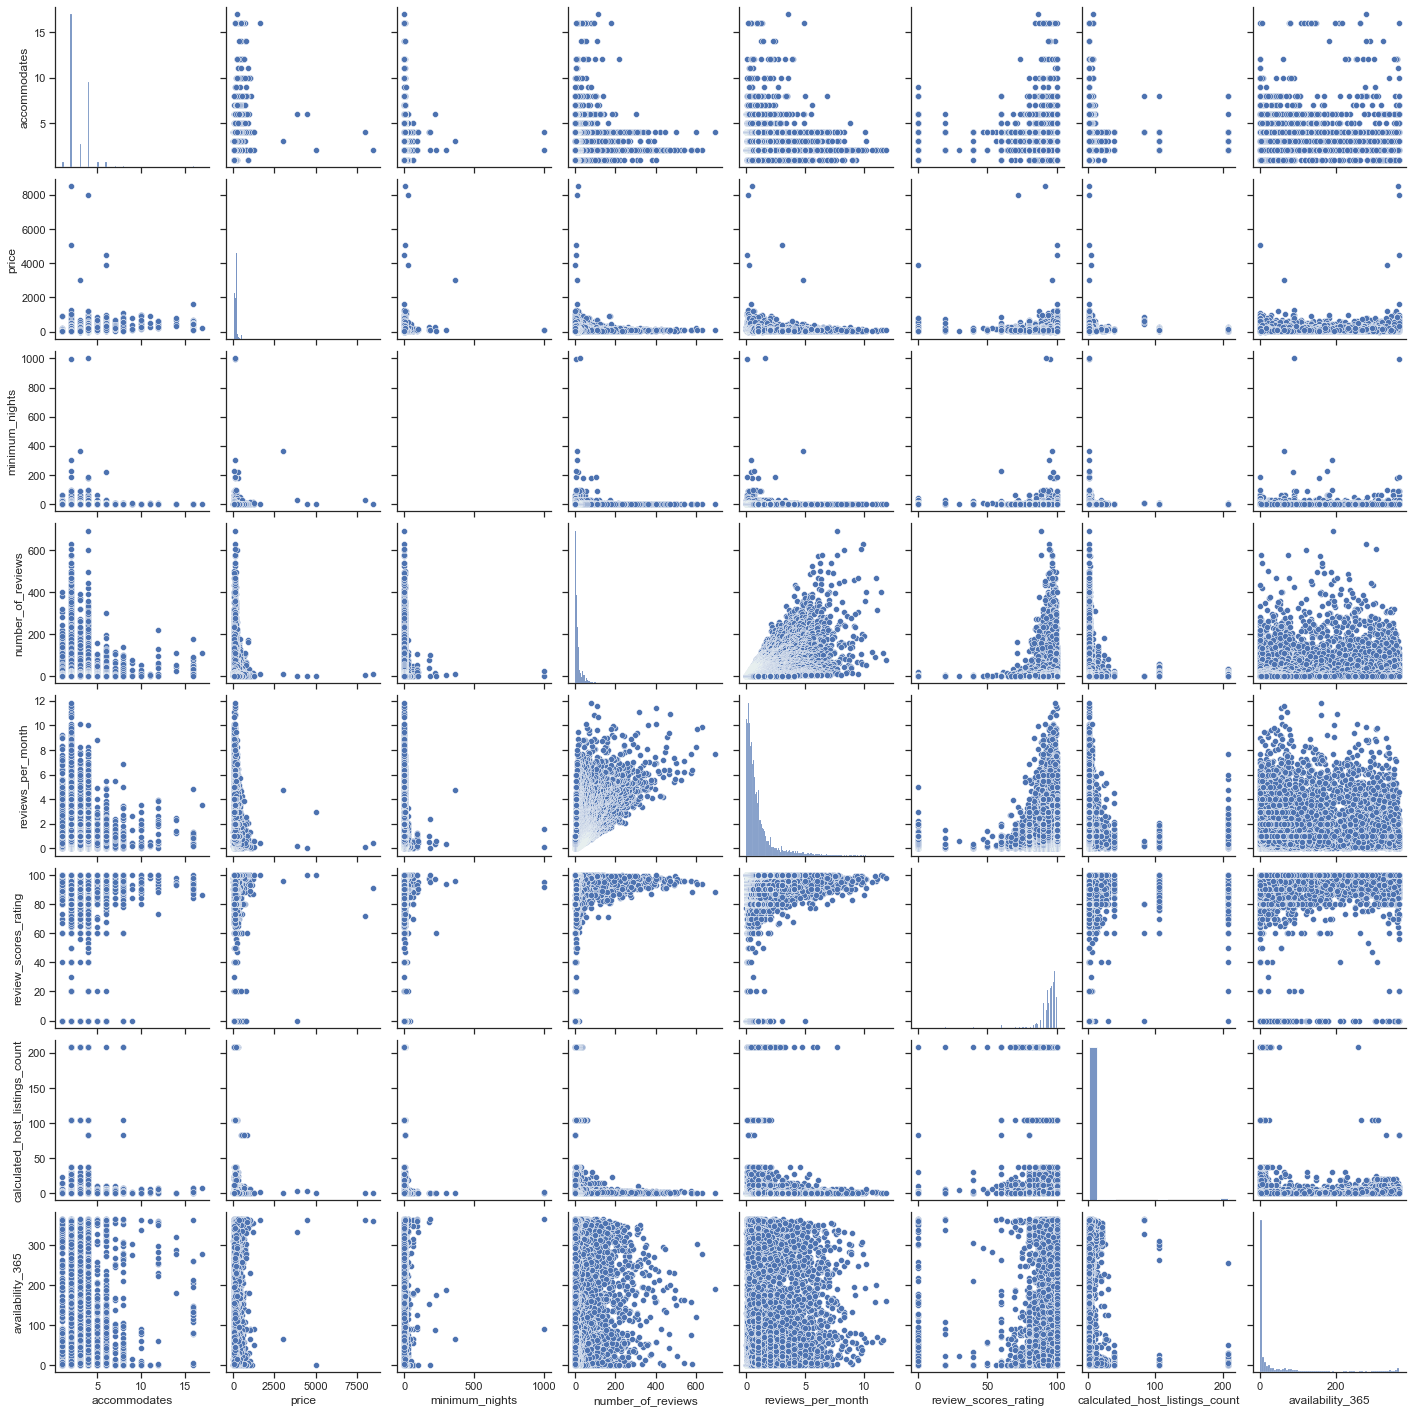

In [56]:
df_ML =df.select('accommodates', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'calculated_host_listings_count', 'availability_365')

sns.set(style="ticks")

sns.pairplot(df_ML.toPandas())
plt.show()

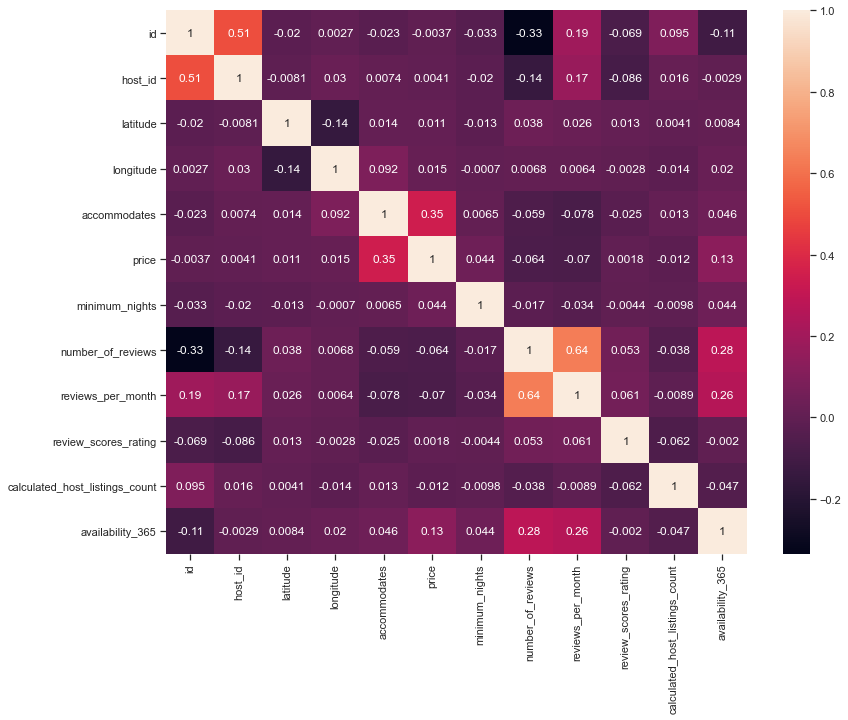

In [57]:
plt.figure(figsize=(13,10))
sns.heatmap(df_viz.corr(), annot=True)
plt.show()

In [58]:
import pyspark.ml.feature 
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.sql.functions import udf, col
from pyspark.ml.feature import StandardScaler

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

print(catagorical_features)
print(numeric_features)

['name', 'host_name', 'neighbourhood', 'property_type', 'room_type', 'last_review']
['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'calculated_host_listings_count', 'availability_365']


### 5.2 Correlation for Features with Price:

In [59]:
import six
for i in df.columns:
    if not( isinstance(df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Price for ", i, df.stat.corr('price',i))

Correlation to Price for  id -0.0037223112250422447
Correlation to Price for  host_id 0.004116983557850611
Correlation to Price for  latitude 0.011391908243367077
Correlation to Price for  longitude 0.015416428831728212
Correlation to Price for  accommodates 0.345114660325423
Correlation to Price for  price 1.0
Correlation to Price for  minimum_nights 0.044116885109817226
Correlation to Price for  number_of_reviews -0.06371649248596141
Correlation to Price for  reviews_per_month -0.07022901731136037
Correlation to Price for  review_scores_rating 0.0017831870425170757
Correlation to Price for  calculated_host_listings_count -0.011832051745958678
Correlation to Price for  availability_365 0.13439710871477542


### 5.3 Scaling String Features using StringIndexer and OneHotEncoder

In [60]:
stringIndexer = StringIndexer(inputCol="name", outputCol="name_index")
model = stringIndexer.fit(df)
indexed = model.transform(df)
df = indexed
encoder = OneHotEncoder(dropLast=False, inputCol="name_index", outputCol="name_vec")
model =encoder.fit(df)
encoded = model.transform(df)
df = encoded



In [61]:
stringIndexer = StringIndexer(inputCol="host_name", outputCol="hostname_index")
model = stringIndexer.fit(df)
indexed = model.transform(df)
df = indexed
encoder = OneHotEncoder(dropLast=False, inputCol="hostname_index", outputCol="hostname_vec")
model =encoder.fit(df)
encoded = model.transform(df)
df = encoded

stringIndexer = StringIndexer(inputCol="neighbourhood", outputCol="neighbourhood_index")
model = stringIndexer.fit(df)
indexed = model.transform(df)
df = indexed
encoder = OneHotEncoder(dropLast=False, inputCol="neighbourhood_index", outputCol="neighbourhood_vec")
model =encoder.fit(df)
encoded = model.transform(df)
df = encoded

stringIndexer = StringIndexer(inputCol="property_type", outputCol="propertytype_index")
model = stringIndexer.fit(df)
indexed = model.transform(df)
df = indexed
encoder = OneHotEncoder(dropLast=False, inputCol="propertytype_index", outputCol="propertytype_vec")
model =encoder.fit(df)
encoded = model.transform(df)
df = encoded

stringIndexer = StringIndexer(inputCol="room_type", outputCol="roomtype_index")
model = stringIndexer.fit(df)
indexed = model.transform(df)
df = indexed
encoder = OneHotEncoder(dropLast=False, inputCol="roomtype_index", outputCol="roomtype_vec")
model =encoder.fit(df)
encoded = model.transform(df)
df = encoded

stringIndexer = StringIndexer(inputCol="last_review", outputCol="lastreview_index")
model = stringIndexer.fit(df)
indexed = model.transform(df)
df = indexed
encoder = OneHotEncoder(dropLast=False, inputCol="lastreview_index", outputCol="lastreview_vec")
model =encoder.fit(df)
encoded = model.transform(df)
df = encoded

In [62]:
df.show(3)
df.printSchema()

+-----+--------------------+-------+---------+--------------------+-----------+-----------+-------------+---------------+------------+-----+--------------+-----------------+-----------+-----------------+--------------------+------------------------------+----------------+----------+--------------------+--------------+-----------------+-------------------+-----------------+------------------+----------------+--------------+-------------+----------------+------------------+
|   id|                name|host_id|host_name|       neighbourhood|   latitude|  longitude|property_type|      room_type|accommodates|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|review_scores_rating|calculated_host_listings_count|availability_365|name_index|            name_vec|hostname_index|     hostname_vec|neighbourhood_index|neighbourhood_vec|propertytype_index|propertytype_vec|roomtype_index| roomtype_vec|lastreview_index|    lastreview_vec|
+-----+--------------------+-------+---------+

### 5.4 Creating Feature Vector and Normalising it:

In [63]:
#Selecting Required features for machine learning model
df2 = df.select('hostname_index','name_index','neighbourhood_index','propertytype_index','roomtype_index','price','accommodates',
                    'minimum_nights','number_of_reviews','reviews_per_month','review_scores_rating','availability_365')
required_features = ['hostname_index','name_index','neighbourhood_index','propertytype_index','roomtype_index','price','accommodates',
                    'minimum_nights','number_of_reviews','reviews_per_month','review_scores_rating','availability_365']

In [72]:
vec_assembler = VectorAssembler(inputCols=required_features,outputCol='features')
vec_df = vec_assembler.transform(df2)
vec_df.show(5)

+--------------+----------+-------------------+------------------+--------------+-----+------------+--------------+-----------------+-----------------+--------------------+----------------+--------------------+
|hostname_index|name_index|neighbourhood_index|propertytype_index|roomtype_index|price|accommodates|minimum_nights|number_of_reviews|reviews_per_month|review_scores_rating|availability_365|            features|
+--------------+----------+-------------------+------------------+--------------+-----+------------+--------------+-----------------+-----------------+--------------------+----------------+--------------------+
|          36.0|   12853.0|                8.0|               0.0|           1.0|   59|           2|             3|              248|              2.1|                97.0|              44|[36.0,12853.0,8.0...|
|          81.0|   12879.0|                4.0|               0.0|           0.0|  160|           5|             4|               42|             1.03|     

In [66]:
# Normalising
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors
normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
Norm_df = normalizer.transform(vec_df)
Norm_df.show(3)

+--------------+----------+-------------------+------------------+--------------+-----+------------+--------------+-----------------+-----------------+--------------------+----------------+--------------------+--------------------+
|hostname_index|name_index|neighbourhood_index|propertytype_index|roomtype_index|price|accommodates|minimum_nights|number_of_reviews|reviews_per_month|review_scores_rating|availability_365|            features|        normFeatures|
+--------------+----------+-------------------+------------------+--------------+-----+------------+--------------+-----------------+-----------------+--------------------+----------------+--------------------+--------------------+
|          36.0|   12853.0|                8.0|               0.0|           1.0|   59|           2|             3|              248|              2.1|                97.0|              44|[36.0,12853.0,8.0...|[0.00269600317529...|
|          81.0|   12879.0|                4.0|               0.0|      

In [67]:
assembler = VectorAssembler().setInputCols(['normFeatures',]).setOutputCol('vec_features')
ML_df =assembler.transform(Norm_df)
ML_df.select('vec_features','price').show()


+--------------------+-----+
|        vec_features|price|
+--------------------+-----+
|[0.00269600317529...|   59|
|[0.00608152395482...|  160|
|[0.04143963039376...|   80|
|[0.13754447539571...|  125|
|[0.09724285229188...|  150|
|[0.09120455450187...|   65|
|[0.21081700837103...|   75|
|[0.02867650388138...|   55|
|[0.04509074512456...|  219|
|[0.63645113827653...|  180|
|[0.06775888677729...|  159|
|[0.10866177322732...|  100|
|[0.03417842525941...|  250|
|[0.01049985125210...|  200|
|[0.04085531382432...|  155|
|[0.00220944671035...|  150|
|[0.17814756894361...|  140|
|[0.40044636421397...|  350|
|[0.02128766734471...|  225|
|[0.00695884173361...|  120|
+--------------------+-----+
only showing top 20 rows



### 5.5 Splitting Data into Test,Train and Applying Machine Learning Model:

In [68]:
train_df,test_df = ML_df.randomSplit([0.7,0.3])
train =train_df.select(F.col("Vec_features").alias("features"),
    F.col("price").alias("label"),
)
test =test_df.select(F.col("Vec_features").alias("features"),
    F.col("price").alias("label"),
)
test

DataFrame[features: vector, label: int]

In [69]:
%%time
from pyspark.ml.regression import LinearRegression

lr_model = LinearRegression().fit(train)
y_pred = lr_model.transform(test)
y_pred.show()

+--------------------+-----+-------------------+
|            features|label|         prediction|
+--------------------+-----+-------------------+
|[0.0,0.3805018510...|   70| -476.2408777400267|
|[0.0,0.3905197953...|  175| 356.11642920533586|
|[0.0,0.4577939418...|  100| -80.41777980208738|
|[0.0,0.4468601236...|  200|  597.3739382849834|
|[0.0,0.4707394604...|  187|  260.0368885519032|
|[0.0,0.6110664425...|  110|  58.99357576108992|
|[0.0,0.7911653205...|   65|-31.796970187989444|
|[0.0,0.7728314398...|  175| 211.93408718036017|
|[0.0,0.8017054004...|  130| 170.59516548500173|
|[0.0,0.8673970626...|   86|  83.83823589550849|
|[0.0,0.8779286034...|  180| 180.65885993532538|
|[0.0,0.9095088107...|  145| 169.04469884566578|
|[0.0,0.9359756906...|  147| 163.18513613932652|
|[0.0,0.9472875230...|  110| 131.64637124767637|
|[0.0,0.9604080259...|   72| 107.50103652625828|
|[0.0,0.9346056637...|  223| 197.31769274599475|
|[0.0,0.9577290109...|  105|  118.4294574187517|
|[0.0,0.9486464983..

In [113]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create both evaluators
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction", metricName='areaUnderROC')

# Get metrics
acc = evaluatorMulti.evaluate(y_pred, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(y_pred, {evaluatorMulti.metricName: "f1"})
Recall = evaluatorMulti.evaluate(y_pred, {evaluatorMulti.metricName: "weightedRecall"})
auc = evaluator.evaluate(y_pred)

In [114]:
print("Accuracy:", acc)    #Accuracy: 0.9659090909090909
print("Recall:", Recall)   #Recall 0.8888888888888888
print("F1Score:", f1)      #F1Score 0.8421052631578948 
print("AUC:", auc)         #AUC: 1.0

Accuracy: 0.9659090909090909
Recall: 0.8888888888888888
F1Score: 0.8421052631578948
AUC: 1.0


In [101]:
print(lr_model.coefficients)
print(lr_model.intercept)

[43.720308436341945,53.78211316797533,4268.032369564379,-3497.7312871653216,1007.3758201766507,3093.5725153079966,-53560.95741217971,-2560.3289473928025,-60.45257211440714,-7588.170013618204,-2485.5841171934835,-8.02888389501721]
87.0819843748819
